In [158]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
from pylab import savefig


In [159]:
url = 'http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv'
df = pd.read_csv(url)
sns.set_theme()
sns.set(rc={'figure.figsize':(15,10)})
sns.set_palette("inferno")


In [160]:
states = {}

for i,j in df.iterrows():
    states[j['State']] = states.get(j['State'], 0) + 1

In [161]:
state_list = set(states)

In [162]:
if not os.path.exists('States'):
    os.mkdir('States')

In [163]:
def toDateTime(s):
    months = {'01':'Jan',
        '02':'Feb',
        '03':'Mar',
        '04':'Apr',
        '05':'May',
        '06':'Jun',
        '07':'Jul',
        '08':'Aug',
        '09':'Sep',
        '10':'Oct',
        '11':'Nov',
        '12':'Dec'}
    date = s.split('/')
    date_day = date[0]
    date_month = months[date[1]]
    return date_day + ' '+ date_month + ' '+ date[2][2:]

toDateTime('16/05/2021')

'16 May 21'

In [164]:
for i,j in df.iterrows():
    j['Updated On'] = toDateTime(j['Updated On'])

df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584,15/05/2021,West Bengal,8955081.0,265500.0,1535.0,8955081.0,3717988.0,4820673.0,4133379.0,1029.0,1395568.0,11277501.0,1034.0,293620.0,839189.0,4023691.0,3797563.0,12673069
4585,16/05/2021,West Bengal,8958736.0,72268.0,365.0,8958736.0,3719913.0,4823003.0,4134704.0,1029.0,1396978.0,11281671.0,1034.0,294191.0,840550.0,4024905.0,3798066.0,12678649
4586,17/05/2021,West Bengal,9001376.0,379622.0,1730.0,9001376.0,3739934.0,4851954.0,4148384.0,1038.0,1421802.0,11319508.0,1036.0,298717.0,852961.0,4043894.0,3804758.0,12741310
4587,18/05/2021,West Bengal,9046876.0,295766.0,1313.0,9046876.0,3758465.0,4882518.0,4163312.0,1046.0,1445968.0,11359373.0,1037.0,303860.0,864675.0,4064819.0,3812446.0,12805341


/opt/homebrew/Caskroom/miniforge/base/envs/tftry/lib/python3.8/site-packages/seaborn-0.11.1-py3.8.egg/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



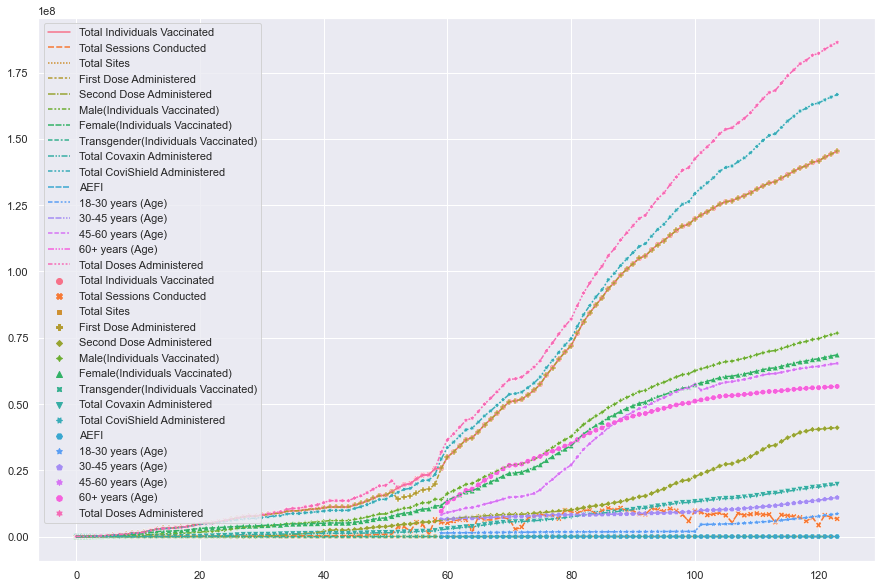

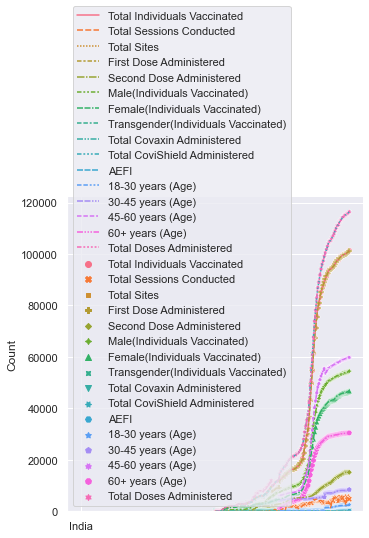

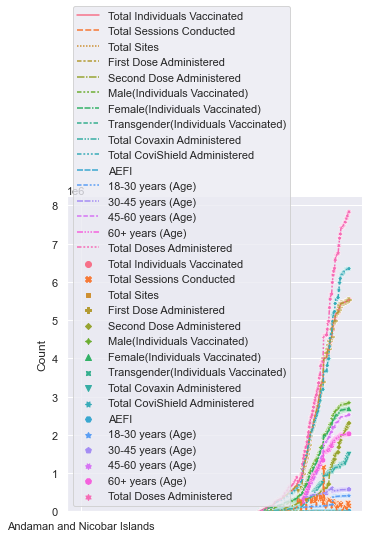

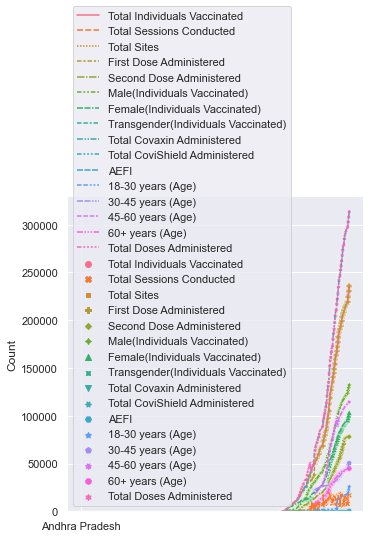

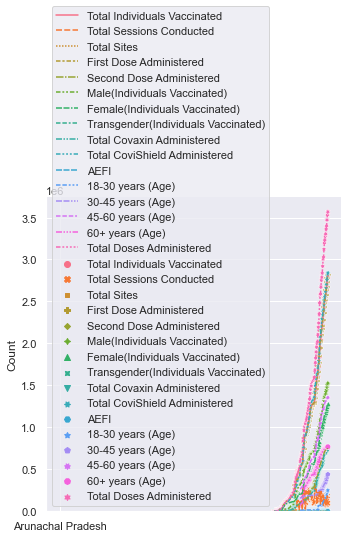

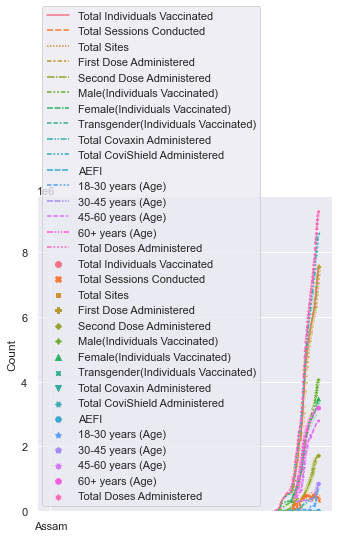

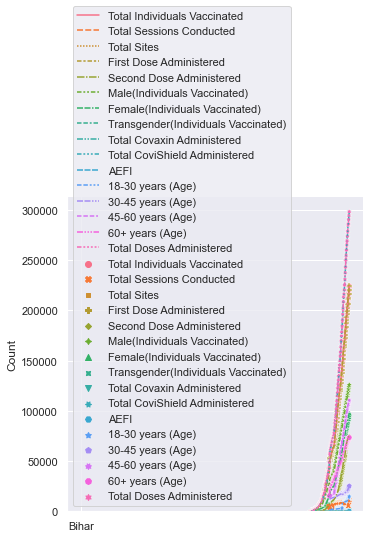

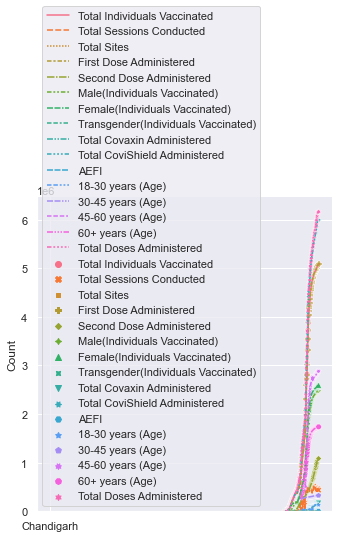

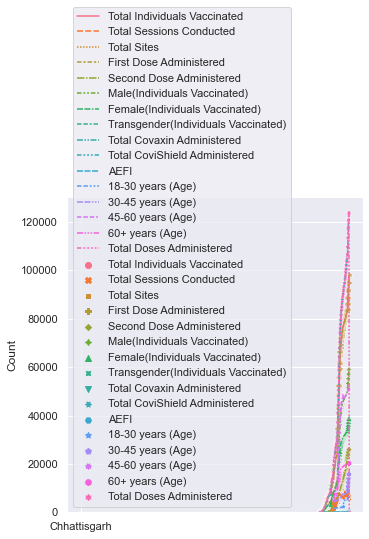

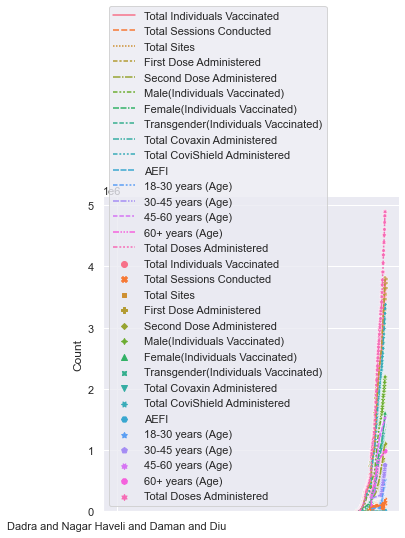

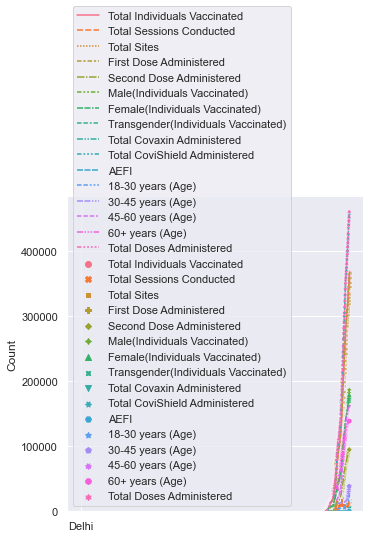

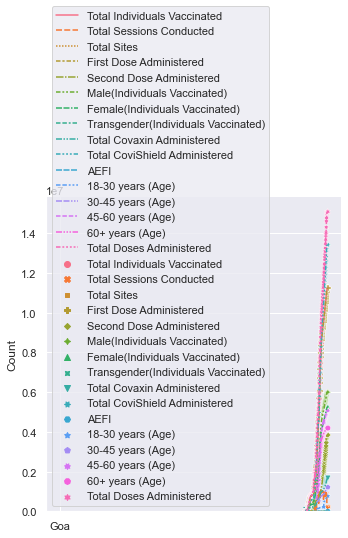

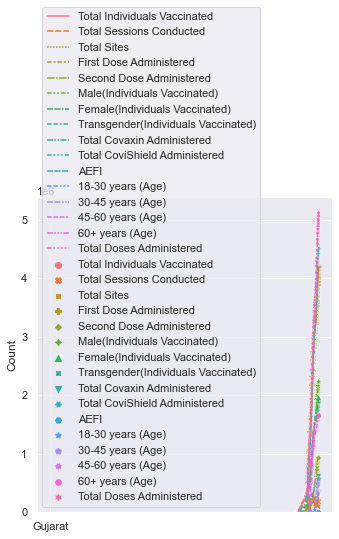

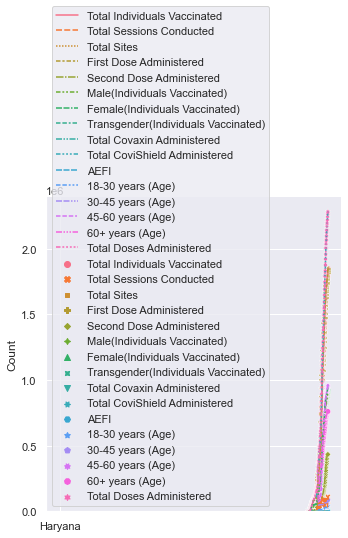

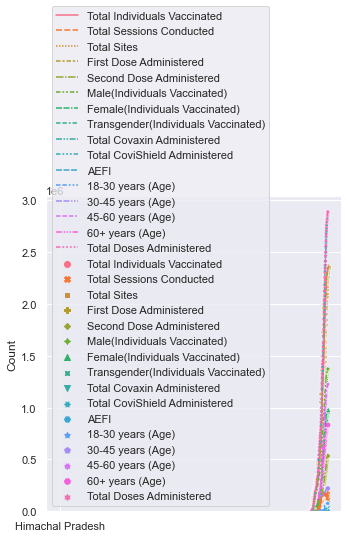

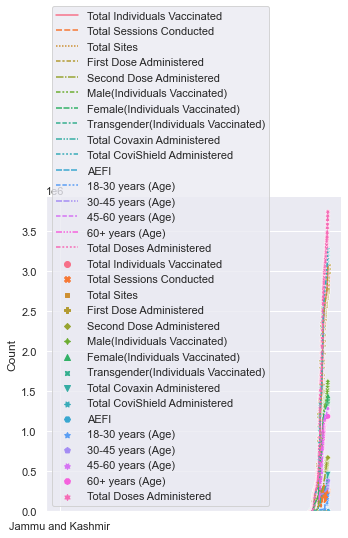

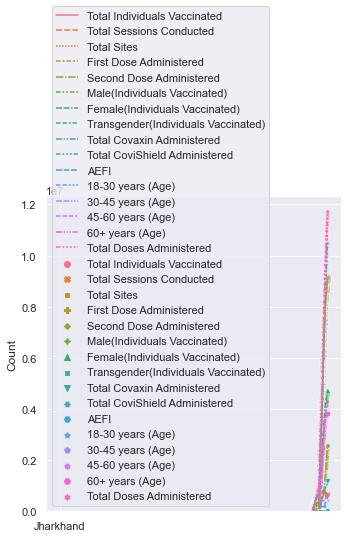

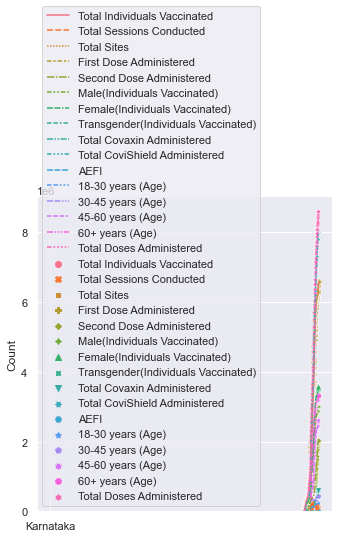

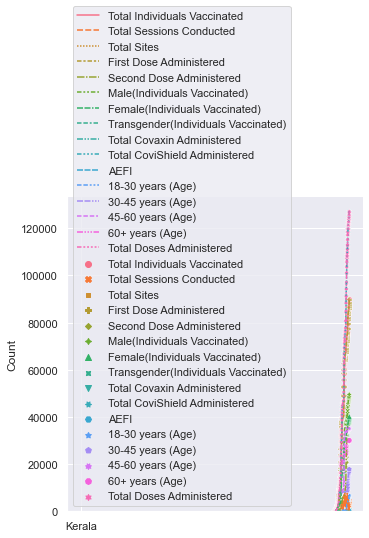

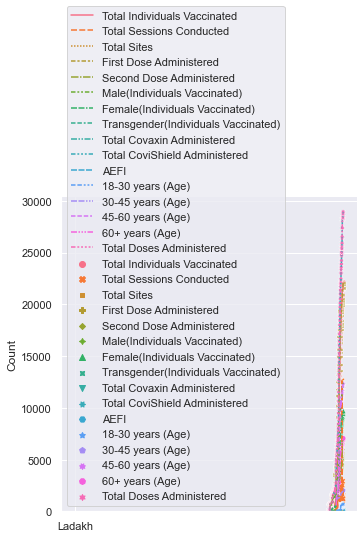

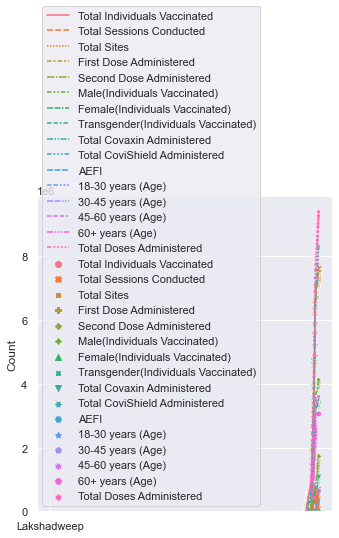

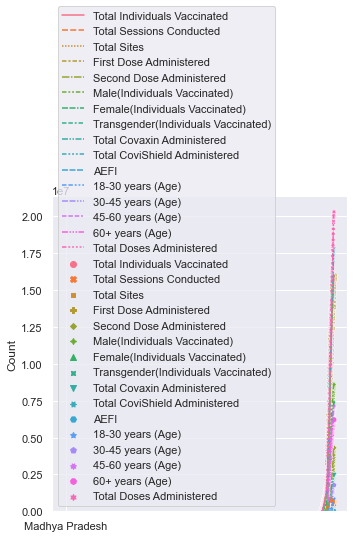

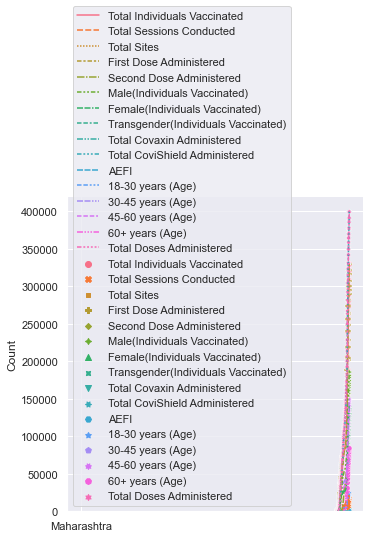

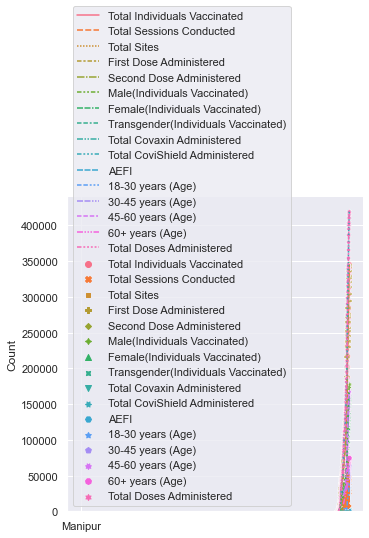

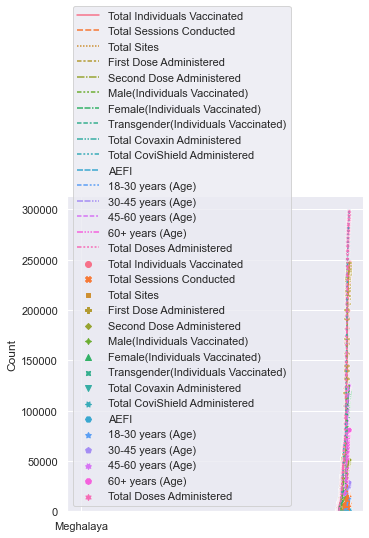

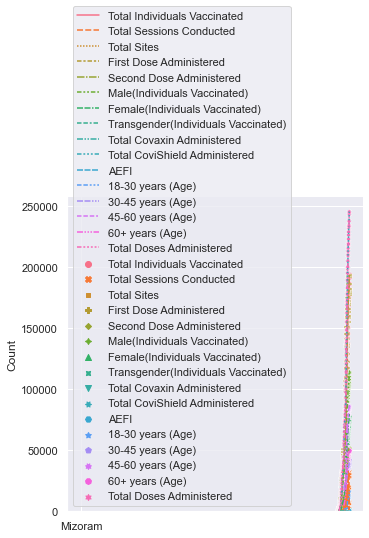

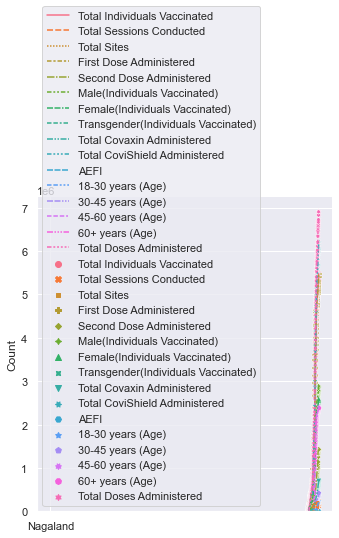

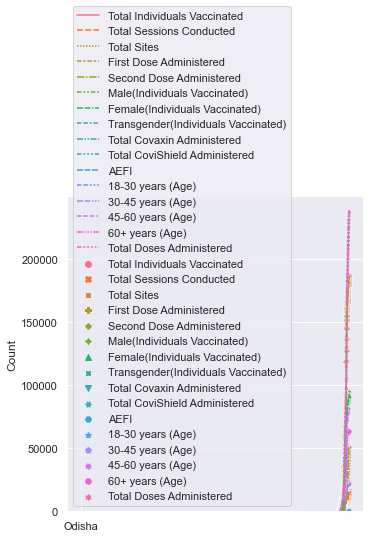

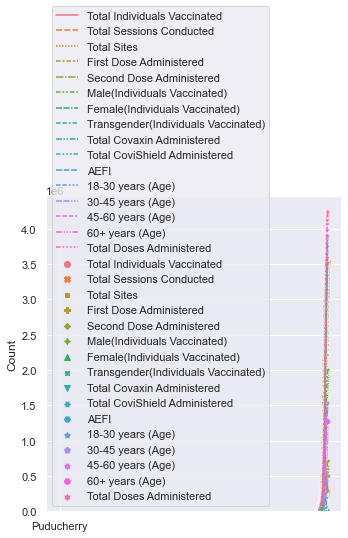

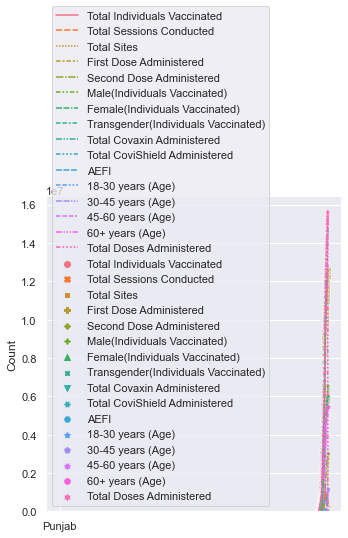

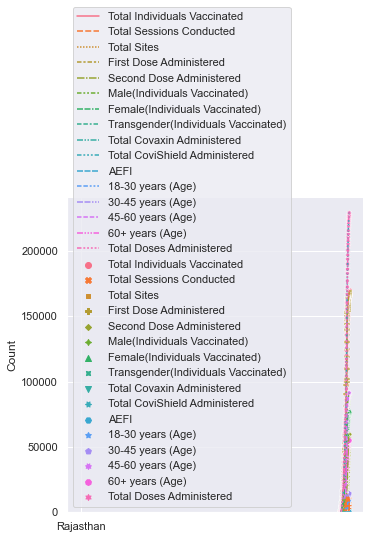

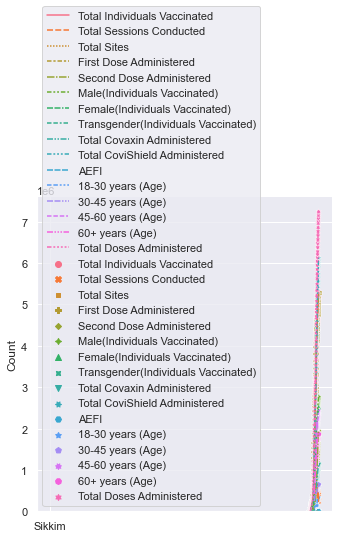

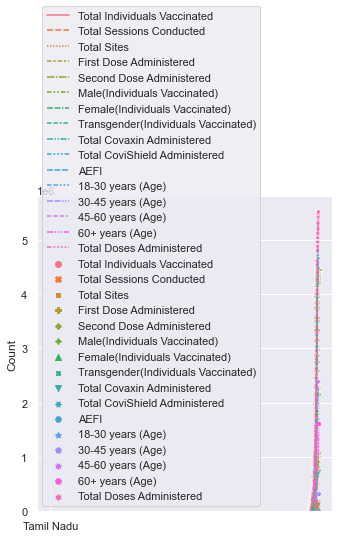

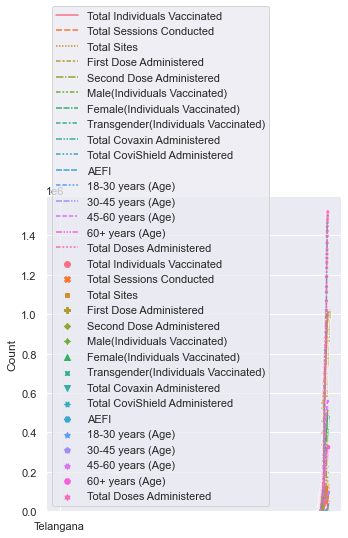

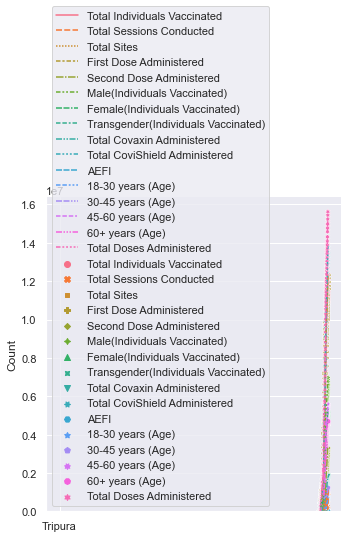

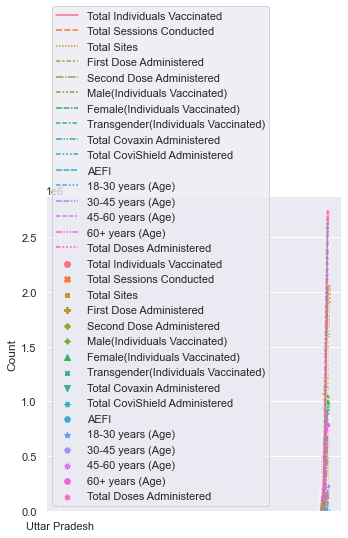

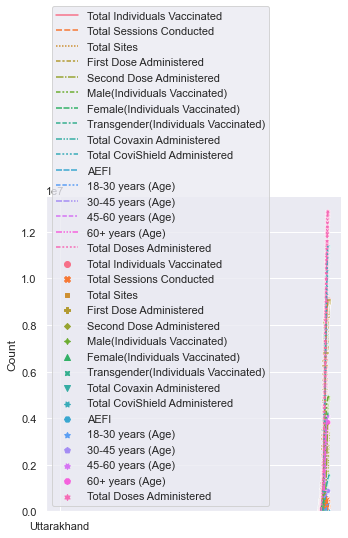

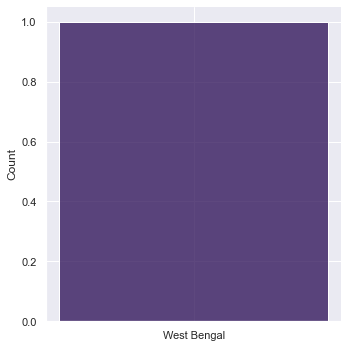

In [165]:
os.chdir(os.getcwd() + '/States')
for state in states.keys():
    if not os.path.exists(state):
        os.mkdir(state)
    state_df = df[df['State'] == state]
    line_plot = sns.lineplot(data = state_df)
    path = state + '/' + state
    plt.savefig(path + '_line.png', dpi = 400)
    scatter_plot = sns.scatterplot(data = state_df)
    plt.savefig(path + '_scatter.png', dpi = 400)
    distplot = sns.displot(data = state)
    plt.savefig(path + '_dist.png', dpi = 400)
    
     
    
    


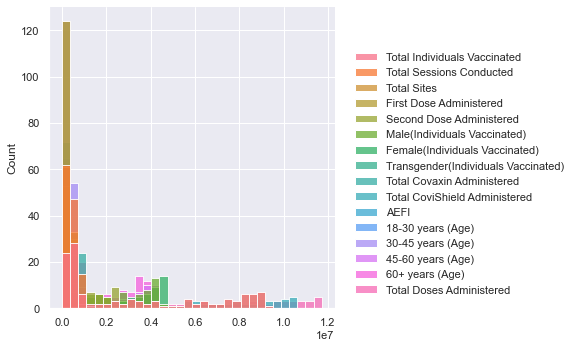

In [166]:
sns.displot(data = karnataka)